#### MNIST Convolutional Neural network Capstone Project
            Saurav Bakshi (Team 4)
            


**Task 1**

Implement a simple CNN with the following parameters fixed. 
A Convolutional layer will have 32 neurons (feature maps) and a 5x5 feature detector.

**Key hyperparameters**
1. Learning Rate = 0.01
2. Activation = **Sigmoid** for Neural Network layers and **Softmax** for output layer
3. Optimizer = Stochastic Gradient Descent (SGD)
4. Epochs = 5
5. Batch Size = 128
6. Metrics = Accuracy
7. Loss Function = Categorical Cross Entropy

Assumption - The dataset will be split into Train, Validation and Test. However for the task 1, validation data will not be used.

**Hypothesis 1 - The CNNs model should still result in a high accuracy even with basic hyperparameters**

In [1]:
import numpy as np
import random as python_random
import os
import tensorflow as tf
print(tf.__version__)
os.environ["PYTHONHASHSEED"] = "0"
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(123)


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score


from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')



2.3.0


#### Data Capture and preprocessing

In [2]:
# utility function to build any model
def build_model(build_fn, activation, n_classes, filter_size, hidden_dense_units=None):
    if hidden_dense_units is None:
        model = build_fn(activation, n_classes, filter_size)
    else:
        model = build_fn(activation, n_classes, filter_size, hidden_dense_units)
        
    return model

In [3]:
# utility function to run any model
def run_model(model, loss, opt, metrics, n_epochs, batch_size, validation_data=None):
    
    model.compile(loss=loss, optimizer=opt,
            metrics=metrics)
    if validation_data is not None:
        model_training_history = model.fit(trainX, trainY, 
                                           validation_data=(valX, valY),
                                            epochs=n_epochs, 
                                           batch_size=batch_size)
    else:
        model_training_history = model.fit(trainX, trainY, 
                                           epochs=n_epochs, 
                                           batch_size=batch_size)
        
    
    
    
       
    return model_training_history, model


In [4]:
def plot_summary(model_training_history, n_epochs, valid=False):
    H = model_training_history
    # plot the training loss and accuracy
    plt.style.use("seaborn")
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
    if valid:
        plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
        plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
        
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()


In [5]:
print("[INFO] Reading MNIST...")
((train_images, train_labels), (testX, testY)) = mnist.load_data()


[INFO] Reading MNIST...


In [6]:
class_types = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [7]:
# scale data to the range of [0, 1]
train_images = train_images.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [8]:
# sample out validation data from trainX
(trainX, valX, trainY, valY) = train_test_split(train_images, train_labels,
                                                test_size=0.2, stratify=train_labels, random_state=42)

In [9]:
# reshape data for input to the convolutional models
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
valX = valX.reshape((valX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28 , 1))

In [10]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
valY = lb.transform(valY)
testY = lb.transform(testY)

In [11]:
def build_task1_model(activation, n_classes, filter_size):
    # Task 1
    model = Sequential()
    model.add(Conv2D(32, filter_size, input_shape=(28, 28, 1), activation=activation))
    model.add(Flatten())
    model.add(Dense(n_classes,activation="softmax"))
    return model

In [12]:
filter_size =(5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"

In [13]:
print(trainX.shape, trainY.shape)

(48000, 28, 28, 1) (48000, 10)


In [14]:
%%timeit

print("------------------------------------------------------------------------------------")
t1_model = build_model(build_task1_model, activation, n_classes, filter_size)
t1_model_hist, t1_model = run_model(t1_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)



------------------------------------------------------------------------------------
Epoch 1/5
375/375 [==============================] - 1s 3ms/step - loss: 4.4999 - accuracy: 0.3514
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.6625 - accuracy: 0.8024
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4810 - accuracy: 0.8586
Epoch 4/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8722
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8825
------------------------------------------------------------------------------------
Epoch 1/5
375/375 [==============================] - 1s 3ms/step - loss: 4.5454 - accuracy: 0.3532
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.6652 - accuracy: 0.8023
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4815 - accuracy: 0.8586
Epoch 4/5
375/375 [===================

In [15]:
t1_model = build_model(build_task1_model, activation, n_classes, filter_size)
t1_model_hist, t1_model = run_model(t1_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)



Epoch 1/5
375/375 [==============================] - 1s 3ms/step - loss: 4.3292 - accuracy: 0.3624
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.6554 - accuracy: 0.8050
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4774 - accuracy: 0.8596
Epoch 4/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8727
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8826


In [16]:
t1_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                184330    
Total params: 185,162
Trainable params: 185,162
Non-trainable params: 0
_________________________________________________________________


In [17]:
# evaluate the network
predictions = t1_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.8926


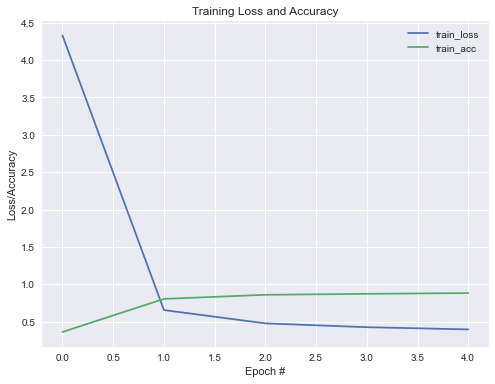

In [19]:
plot_summary(t1_model_hist, n_epochs)

#### Task 1 Findings

1. Model Accuracy is 89.26%
2. The average time taken to train the model is - 5.12 s on MNIST data

### Task 2
- Increase the complexity of the CNN by adding multiple convolution and dense layers. 
- Add one more convolutional layer with 32 neurons (feature maps) and a 5x5 feature detector. 
- Add a dense layer with 128 nodes.

**Key hyperparameters**
1. Learning Rate = 0.01
2. Activation = **Sigmoid** for Neural Network layers and **Softmax** for output layer
3. Optimizer = Stochastic Gradient Descent (SGD)
4. Epochs = 5
5. Batch Size = 128
6. Metrics = Accuracy
7. Loss Function = Categorical Cross Entropy

Assumption - The dataset will be split into Train, Validation and Test. However for the task 1, validation data will not be used.

**Hypothesis 2 - When we increase the complexity of the Convolutional Neural Network, the time to train increases but the accuracy improves.**

In [20]:
def build_task2_model(activation, n_classes, filter_size, hidden_dense_units):
    # Task 2
    model = Sequential()
    model.add(Conv2D(32, filter_size, input_shape=(28, 28, 1), activation=activation))
    model.add(Conv2D(32, filter_size, activation=activation))
    model.add(Flatten())
    model.add(Dense(units=hidden_dense_units, activation=activation))
    model.add(Flatten())
    model.add(Dense(n_classes))
    model.add(Activation("softmax"))
    return model

In [21]:
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"

In [23]:
%%timeit

print("------------------------------------------------------------------------------------")
t2_model = build_model(build_task2_model, activation, n_classes, filter_size, hidden_dense_units)
t2_model_hist, t2_model = run_model(t2_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

------------------------------------------------------------------------------------
Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3065 - accuracy: 0.1033
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3005 - accuracy: 0.1135
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 2.2916 - accuracy: 0.1239
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 2.2589 - accuracy: 0.1938
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 1.9907 - accuracy: 0.4934
------------------------------------------------------------------------------------
Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3079 - accuracy: 0.1051
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3020 - accuracy: 0.1112
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 2.2962 - accuracy: 0.1208
Epoch 4/5
375/375 [===================

In [24]:
# recompile the model for training at epoch = 5
t2_model = build_model(build_task2_model, activation, n_classes, filter_size, hidden_dense_units)
t2_model_hist, t2_model = run_model(t2_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3070 - accuracy: 0.1051
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 2.2944 - accuracy: 0.1274
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 2.2750 - accuracy: 0.1666
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 2.1582 - accuracy: 0.3544


In [25]:
t2_model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
flatten_41 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               1638528   
_________________________________________________________________
flatten_42 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_16 (Activation)   (None, 10)              

In [26]:
# evaluate the network
predictions = t2_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.521


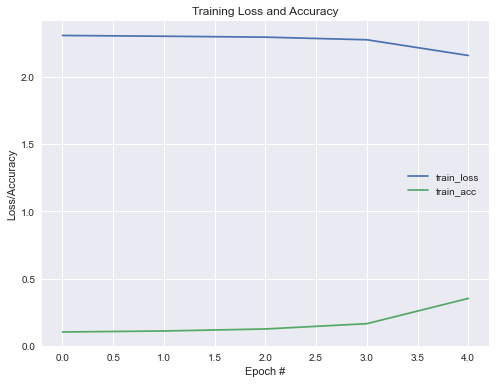

In [27]:
plot_summary(t2_model_hist, n_epochs)

#### Task 2 Findings

1. Model Accuracy is 52.1% - This prove the hypothesis to be **False** as the prediction performance has degraded drastically.
2. The average time taken to train the model is - 10 s on MNIST data which 2 times more than the Task 1 training time.

#### Task 3 

#### Improving the models built in Task 1 and Task 2
**Hypothesis T3_H1 - Increasing number of epochs can increase accuracy?**

In [28]:
# Hyperparameters for Hypothesis T3_H1
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
# n_epochs = 5 initial number of epochs
# all other hyperparameters remaining the same , number of epochs is increased to 10
n_epochs = 10

In [29]:
# train the task 1 model for the epoch = 10
t1_model = build_model(build_task1_model, activation, n_classes, filter_size)
t1_model_hist, t1_model = run_model(t1_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 4.4208 - accuracy: 0.3496
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.6559 - accuracy: 0.8046
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.8590
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.8720
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3988 - accuracy: 0.8824
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3812 - accuracy: 0.8868
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3696 - accuracy: 0.8896
Epoch 8/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3577 - accuracy: 0.8931
Epoch 9/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.8958
Epoch 10/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8985

In [30]:
# evaluate the network
predictions = t1_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.9064


In [31]:
# train the task 2 model for epoch = 10
t2_model = build_model(build_task2_model, activation, n_classes, filter_size, hidden_dense_units)
t2_model_hist, t2_model = run_model(t2_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3065 - accuracy: 0.1067
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3006 - accuracy: 0.1172
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2931 - accuracy: 0.1252
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2720 - accuracy: 0.1685
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.1389 - accuracy: 0.3916
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 1.4016 - accuracy: 0.7122
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.7985 - accuracy: 0.8154
Epoch 8/10
375/375 [==============================] - 2s 5ms/step - loss: 0.6058 - accuracy: 0.8473
Epoch 9/10
375/375 [==============================] - 2s 5ms/step - loss: 0.5184 - accuracy: 0.8625
Epoch 10/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4667 - accuracy: 0.8734

In [32]:
# evaluate the network
predictions = t2_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.8836


Number of epochs = 10

Task 1 model Accuracy : 90.64%

Task 2 model Accuracy : 88.36% 

#### Improving the models built in Task 1 and Task 2
**Hypothesis T3_H2 - Reducing the number of batches can increase accuracy?**

In [33]:
# Hyperparameters for Hypothesis T3_H2 - switching back the number of epochs to 5
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
hidden_dense_units = 128
# reducing the number of batches to 64
batch_size = 64
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5

In [34]:
# train the task 1 model for the batch_size = 64
t1_model = build_model(build_task1_model, activation, n_classes, filter_size)
t1_model_hist, t1_model = run_model(t1_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
750/750 [==============================] - 1s 2ms/step - loss: 2.8557 - accuracy: 0.5869
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 0.4612 - accuracy: 0.8608
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8809
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3718 - accuracy: 0.8885
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8933


In [35]:
# evaluate the network
predictions = t1_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.8993


In [36]:
# train the task 2 model for epoch = 10
t2_model = build_model(build_task2_model, activation, n_classes, filter_size, hidden_dense_units)
t2_model_hist, t2_model = run_model(t2_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 2.3105 - accuracy: 0.1037
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 2.3022 - accuracy: 0.1096
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 2.2897 - accuracy: 0.1331
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 1.9981 - accuracy: 0.4044
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.8406 - accuracy: 0.7965


In [37]:
# evaluate the network
predictions = t2_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.8561


**Reducing the batch size also shows improvements in the Accuracy of the model.**


Task 1 model (Baseline) Accuracy - 89.3%
Task 1 model Accuracy after reducing the batch size to 64 - 89.93%

**There is a slight improvement in T1 Model**

Task 2 model (Baseline) Accuracy - 69.27%
Task 2 model Accuracy after reducing the batch size to 64 - 85.61%

**There is a big improvement in T2 Model**

Q2 - Using only convolutional layers will hyperparameter optimization have any impact help in increasing the accuracy?
- Number of layers
- Number of nodes
- learning rate


#### Improving the models built in Task 1 and Task 2
**Hypothesis T3_H3 - Increasing one more Conv2D layer can increase accuracy?**

In [38]:
def build_task3h3_model(activation, n_classes, filter_size, hidden_dense_units):
    # Task 2
    model = Sequential()
    model.add(Conv2D(32, filter_size, input_shape=(28, 28, 1), activation=activation))
    model.add(Conv2D(32, filter_size, activation=activation))
    
    # add one more Conv2D layer
    model.add(Conv2D(32, filter_size, activation=activation))
    
    model.add(Flatten())
    model.add(Dense(units=hidden_dense_units, activation=activation))
    model.add(Flatten())
    model.add(Dense(n_classes))
    model.add(Activation("softmax"))
    return model

In [39]:
# Hyperparameters for Hypothesis T3_H3
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5

In [40]:
t3h3_model = build_model(build_task3h3_model, activation, n_classes, filter_size, hidden_dense_units)
t3h3_model_hist, t3h3_model = run_model(t3h3_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 2.3071 - accuracy: 0.1035
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 2.3044 - accuracy: 0.1060
Epoch 3/5
375/375 [==============================] - 2s 7ms/step - loss: 2.3039 - accuracy: 0.1079
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 2.3039 - accuracy: 0.1085
Epoch 5/5
375/375 [==============================] - 2s 7ms/step - loss: 2.3035 - accuracy: 0.1068


In [41]:
t3h3_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
flatten_49 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               1048704   
_________________________________________________________________
flatten_50 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)              

In [42]:
# evaluate the network
predictions = t3h3_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.0958


**Hypothesis T3H3 is not true.**
We can see that adding one more Conv2D layer has actually degraded the accuracy drastically. It needs to be tested if adding a pooling layers would improve the accuracy.

#### Improving the models built in Task 1 and Task 2
**Hypothesis T3_H4 - Increasing the number of Dense Layers in Conv2D can increase accuracy?**

In [43]:
def build_task3h4_model(activation, n_classes, filter_size, hidden_dense_units):
    # Task 2
    model = Sequential()
    model.add(Conv2D(32, filter_size, input_shape=(28, 28, 1), activation=activation))
    model.add(Conv2D(32, filter_size, activation=activation))
    
    #Dense layer 1
    model.add(Flatten())
    model.add(Dense(units=hidden_dense_units, activation=activation))
    
    #Dense layer 2
    model.add(Flatten())
    model.add(Dense(units=hidden_dense_units, activation=activation))
    model.add(Flatten())
    model.add(Dense(n_classes))
    model.add(Activation("softmax"))
    return model

In [44]:
# Hyperparameters for Hypothesis T3_H4
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5

In [45]:
t3h4_model = build_model(build_task3h4_model, activation, n_classes, filter_size, hidden_dense_units)
t3h4_model_hist, t3h4_model = run_model(t3h4_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3077 - accuracy: 0.1082
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3018 - accuracy: 0.1106
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3018 - accuracy: 0.1124
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3017 - accuracy: 0.1126
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3015 - accuracy: 0.1106


In [46]:
t3h4_model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
flatten_51 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               1638528   
_________________________________________________________________
flatten_52 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
flatten_53 (Flatten)         (None, 128)             

In [48]:
# evaluate the network
predictions = t3h4_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.1135


**Hypothesis T3H4 is not true.**
We can see that adding one more dense layer has actually degraded the accuracy drastically. It needs to be tested if adding a pooling layers would improve the accuracy.

#### Improving the models built in Task 1 and Task 2
**Hypothesis T3_H5 - Increasing the number of nodes in the Conv2D layer can increase accuracy?**
1. Only the first Conv2D layer nodes are doubled
2. Only the second Conv2D layer nodes are doubled
3. Both Conv2D layer nodes are doubled
4. Explore the impacts of different node sizes on all the three conditions (stretch goal - not implemented yet)

**Hypothesis T3_H5_1 - Only the first Conv2D layer nodes are doubled**

In [49]:
def build_task3h5_1_model(activation, n_classes, filter_size, hidden_dense_units):
    # Task 2
    model = Sequential()
    
    # Conv 2D layer 1
    # chaning the number of nodes for layer 1 = 64 only to the first Conv2D layer
    model.add(Conv2D(64, filter_size, input_shape=(28, 28, 1), activation=activation))
    model.add(Conv2D(32, filter_size, activation=activation))
    
      
    #Dense layer 1
    model.add(Flatten())
    model.add(Dense(units=hidden_dense_units, activation=activation))
    model.add(Flatten())
    model.add(Dense(n_classes))
    model.add(Activation("softmax"))
    return model

In [50]:
# Hyperparameters for Hypothesis T3_H5_1
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5

In [51]:
t3h5_1_model = build_model(build_task3h5_1_model, activation, n_classes, filter_size, hidden_dense_units)
t3h5_1_model_hist, t3h5_1_model = run_model(t3h5_1_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 2.3077 - accuracy: 0.1050
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 2.3028 - accuracy: 0.1098
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 2.2976 - accuracy: 0.1204
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 2.2856 - accuracy: 0.1431
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 2.2242 - accuracy: 0.2779


In [52]:
t3h5_1_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 20, 20, 32)        51232     
_________________________________________________________________
flatten_54 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               1638528   
_________________________________________________________________
flatten_55 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_21 (Activation)   (None, 10)              

In [53]:
# evaluate the network
predictions = t3h5_1_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.336


**Hypothesis T3_H5_2 - Only the second Conv2D layer nodes are doubled**

In [54]:
def build_task3h5_2_model(activation, n_classes, filter_size, hidden_dense_units):
    # Task 2
    model = Sequential()
    
    # Conv 2D layer 1
    # chaning the number of nodes for layer 2 = 64 only to the first Conv2D layer
    model.add(Conv2D(32, filter_size, input_shape=(28, 28, 1), activation=activation))
    model.add(Conv2D(64, filter_size, activation=activation))
    
      
    #Dense layer 1
    model.add(Flatten())
    model.add(Dense(units=hidden_dense_units, activation=activation))
    model.add(Flatten())
    model.add(Dense(n_classes))
    model.add(Activation("softmax"))
    return model

In [55]:
# Hyperparameters for Hypothesis T3_H5_2
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5

In [56]:
t3h5_2_model = build_model(build_task3h5_2_model, activation, n_classes, filter_size, hidden_dense_units)
t3h5_2_model_hist, t3h5_2_model = run_model(t3h5_2_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 2.3107 - accuracy: 0.1042
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 2.3029 - accuracy: 0.1092
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 2.3002 - accuracy: 0.1147
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 2.2972 - accuracy: 0.1219
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 2.2869 - accuracy: 0.1354


In [57]:
# evaluate the network
predictions = t3h5_2_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.0959


Hypothesis T3H5 is not true.
We can see that adding one more nodes to Dense layer has actually degraded the performances. It needs to be tested if adding a pooling layers would improve the accuracy or it may require more epochs

**Hypothesis T3_H5_3 - Both Conv2D layer nodes are doubled**

In [58]:
def build_task3h5_3_model(activation, n_classes, filter_size, hidden_dense_units):
    
    model = Sequential()
    
    # Conv 2D layer 1
    # changing the number of nodes for both layers to 64 
    model.add(Conv2D(64, filter_size, input_shape=(28, 28, 1), activation=activation))
    model.add(Conv2D(64, filter_size, activation=activation))
    
      
    #Dense layer 1
    model.add(Flatten())
    model.add(Dense(units=hidden_dense_units, activation=activation))
    model.add(Flatten())
    model.add(Dense(n_classes))
    model.add(Activation("softmax"))
    return model

In [59]:
# Hyperparameters for Hypothesis T3_H5_3
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5

In [60]:
t3h5_3_model = build_model(build_task3h5_3_model, activation, n_classes, filter_size, hidden_dense_units)
t3h5_3_model_hist, t3h5_3_model = run_model(t3h5_3_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
375/375 [==============================] - 3s 9ms/step - loss: 2.3092 - accuracy: 0.1032
Epoch 2/5
375/375 [==============================] - 3s 9ms/step - loss: 2.3030 - accuracy: 0.1091
Epoch 3/5
375/375 [==============================] - 3s 9ms/step - loss: 2.3013 - accuracy: 0.1120
Epoch 4/5
375/375 [==============================] - 3s 9ms/step - loss: 2.2997 - accuracy: 0.1147
Epoch 5/5
375/375 [==============================] - 3s 9ms/step - loss: 2.2963 - accuracy: 0.1238


In [61]:
# evaluate the network
predictions = t3h5_3_model.predict(testX, batch_size=batch_size)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.0958


#### Improving the models built in Task 1 and Task 2
**Hypothesis T3_H6 - Increasing the number of nodes in the Dense layer can increase accuracy?**

In [63]:
# Hyperparameters for Hypothesis T3_H6
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
# reducing the hidden_dense_units to 256
hidden_dense_units = 256
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5

In [64]:
def build_task3h6_model(activation, n_classes, filter_size, hidden_dense_units):
    # Task 2
    model = Sequential()
    
    # Conv 2D layer 1
    model.add(Conv2D(32, filter_size, input_shape=(28, 28, 1), activation=activation))
    model.add(Conv2D(32, filter_size, activation=activation))
    
      
    #Dense layer 1
    model.add(Flatten())
    model.add(Dense(units=hidden_dense_units, activation=activation))
    model.add(Flatten())
    model.add(Dense(n_classes))
    model.add(Activation("softmax"))
    return model

In [65]:
t3h6_model = build_model(build_task3h6_model, activation, n_classes, filter_size, hidden_dense_units)
t3h6_model_hist, t3h6_model = run_model(t3h6_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3091 - accuracy: 0.1053
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 2.3030 - accuracy: 0.1095
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 2.2961 - accuracy: 0.1180
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 2.2804 - accuracy: 0.1521
Epoch 5/5
375/375 [==============================] - 2s 6ms/step - loss: 2.2067 - accuracy: 0.2963


In [66]:
t3h6_model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
flatten_60 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               3277056   
_________________________________________________________________
flatten_61 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_24 (Activation)   (None, 10)              

In [67]:
# evaluate the network
predictions = t3h6_model.predict(testX, batch_size=128)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.3698


#### Improving the models built in Task 1 and Task 2
**Hypothesis T3_H7_1 - Reducing the learning rate can improve accuracy?**

The model built for Task 2 will be used for checking this

In [68]:
# Hyperparameters for Hypothesis T3_H7
filter_size = (5, 5)
activation = "sigmoid"
# reducing the learning rate to 0.001
learning_rate = 0.001
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5

In [69]:
# train the task 2 model for learning rate = 0.001
t2_model = build_model(build_task2_model, activation, n_classes, filter_size, hidden_dense_units)
t2_model_hist, t2_model = run_model(t2_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3099 - accuracy: 0.1073
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3016 - accuracy: 0.1101
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3014 - accuracy: 0.1112
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3012 - accuracy: 0.1127
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3008 - accuracy: 0.1116


In [70]:
# evaluate the network
predictions = t2_model.predict(testX, batch_size=128)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.1135


Hypothesis T3H6 is not true.
We can see that reducing learning rate has actually degraded the performances. It needs to be tested if adding a pooling layers would improve the accuracy or it may require more epochs

#### Improving the models built in Task 1 and Task 2
**Hypothesis T3_H7_2 - Increasing the learning rate can improve accuracy?**

In [71]:
# Hyperparameters for Hypothesis T3_H7
filter_size = (5, 5)
activation = "sigmoid"
# change the learning rate to 0.1
learning_rate = 0.1
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5


In [72]:
# train the task 2 model for learning rate = 0.001
t2_model = build_model(build_task2_model, activation, n_classes, filter_size, hidden_dense_units)
t2_model_hist, t2_model = run_model(t2_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=None)

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 2.3151 - accuracy: 0.1040
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 1.3143 - accuracy: 0.5578
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.3762 - accuracy: 0.8894
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.2881 - accuracy: 0.9146
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.2400 - accuracy: 0.9286


In [73]:
# evaluate the network
predictions = t2_model.predict(testX, batch_size=128)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.9357


Hypothesis T3H7 is not true.
We can see that reducing learning rate has actually degraded the performances. It needs to be tested if adding a pooling layers would improve the accuracy or it may require more epochs

#### Improving the models built in Task 1 and Task 2
**Hypothesis T3_H8 - Training with the holdout Validation set can improve accuracy?**

In [74]:
# Hyperparameters for Hypothesis T3_H7
filter_size = (5, 5)
activation = "sigmoid"
learning_rate = 0.01
opt = SGD(learning_rate)
hidden_dense_units = 128
batch_size = 128
n_epochs = 5
n_classes = len(class_types)
metrics = ["accuracy"]
loss = "categorical_crossentropy"
n_epochs = 5

In [75]:
# train the task 2 model with Validation Data
t2_model = build_model(build_task2_model, activation, n_classes, filter_size, hidden_dense_units)
t2_model_hist, t2_model = run_model(t2_model, loss, 
                                              opt, metrics, n_epochs, 
                                              batch_size, validation_data=(valX, valY))

Epoch 1/5
375/375 [==============================] - 2s 6ms/step - loss: 2.3071 - accuracy: 0.1049 - val_loss: 2.3045 - val_accuracy: 0.1044
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 2.3021 - accuracy: 0.1105 - val_loss: 2.3023 - val_accuracy: 0.0988
Epoch 3/5
375/375 [==============================] - 2s 6ms/step - loss: 2.2969 - accuracy: 0.1220 - val_loss: 2.2937 - val_accuracy: 0.1123
Epoch 4/5
375/375 [==============================] - 2s 6ms/step - loss: 2.2872 - accuracy: 0.1403 - val_loss: 2.2784 - val_accuracy: 0.1047
Epoch 5/5
375/375 [==============================] - 2s 6ms/step - loss: 2.2544 - accuracy: 0.2225 - val_loss: 2.2191 - val_accuracy: 0.1799


In [76]:
# evaluate the network
predictions = t2_model.predict(testX, batch_size=128)
acc_score = accuracy_score(testY.argmax(axis=1),
                           predictions.argmax(axis=1))
print(f"Model Accuracy {acc_score}")

Model Accuracy 0.1759


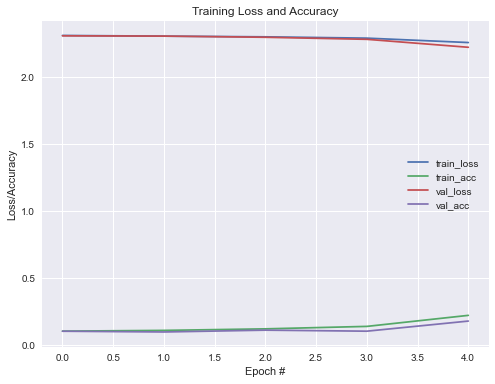

In [78]:
plot_summary(t2_model_hist, n_epochs, valid=True)

There is not much improvement the accuracy - however it seems like the training curve is close to the validation curve - which means lesser overfitting if more epochs are run or more hypertuning is performed. The Task 4 will use Validation data all the time.